In [51]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt

import tensorflow as tf

tf.enable_eager_execution()

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 1.14.0
Eager execution: True


In [52]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: C:\Users\margooka\.keras\datasets\iris_training.csv


In [53]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [54]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [55]:
batch_size = 32

train_dataset = tf.contrib.data.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [56]:
features, labels = next(iter(train_dataset))

features

OrderedDict([('sepal_length',
              <tf.Tensor: id=106025, shape=(32,), dtype=float32, numpy=
              array([4.9, 7.7, 4.6, 5. , 5.7, 5.2, 6. , 6.3, 4.9, 5.3, 5.5, 6.8, 4.8,
                     5.8, 5.4, 6.8, 6.7, 4.4, 6.9, 5.1, 7.2, 5.1, 5.1, 6.9, 5.8, 6.4,
                     5. , 6.3, 5.5, 5.5, 5. , 6.4], dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: id=106026, shape=(32,), dtype=float32, numpy=
              array([3.1, 3.8, 3.1, 2. , 3. , 2.7, 2.2, 3.3, 3.1, 3.7, 2.6, 2.8, 3.1,
                     2.7, 3.4, 3.2, 3.1, 3. , 3.1, 3.8, 3.6, 3.8, 2.5, 3.1, 2.8, 2.8,
                     3.4, 2.3, 2.4, 2.4, 3.4, 2.7], dtype=float32)>),
             ('petal_length',
              <tf.Tensor: id=106023, shape=(32,), dtype=float32, numpy=
              array([1.5, 6.7, 1.5, 3.5, 4.2, 3.9, 5. , 6. , 1.5, 1.5, 4.4, 4.8, 1.6,
                     4.1, 1.5, 5.9, 4.4, 1.3, 4.9, 1.9, 6.1, 1.6, 3. , 5.1, 5.1, 5.6,
                     1.6, 4.4, 3.7, 3.8

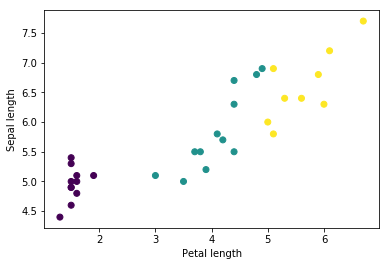

In [57]:
plt.scatter(features['petal_length'].numpy(),
            features['sepal_length'].numpy(),
            c=labels.numpy(),
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [58]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [59]:
train_dataset = train_dataset.map(pack_features_vector)

In [60]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[4.9 3.1 1.5 0.1]
 [7.7 3.8 6.7 2.2]
 [4.6 3.1 1.5 0.2]
 [5.  2.  3.5 1. ]
 [5.7 3.  4.2 1.2]], shape=(5, 4), dtype=float32)


In [61]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [62]:
predictions = model(features)
predictions[:5]

<tf.Tensor: id=106165, shape=(5, 3), dtype=float32, numpy=
array([[2.3763747 , 1.7301993 , 0.04147398],
       [4.1755166 , 2.9133115 , 0.08936441],
       [2.278953  , 1.6404141 , 0.01395166],
       [2.4835386 , 1.8214601 , 0.11932731],
       [3.0184805 , 2.1289124 , 0.06688398]], dtype=float32)>

In [63]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=106171, shape=(5, 3), dtype=float32, numpy=
array([[0.616954  , 0.32331243, 0.05973354],
       [0.7693296 , 0.21774277, 0.01292764],
       [0.6127852 , 0.3235894 , 0.06362543],
       [0.62119454, 0.3203986 , 0.05840684],
       [0.68348527, 0.2807984 , 0.03571635]], dtype=float32)>

In [64]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
    Labels: [0 2 0 1 1 1 2 2 0 0 1 1 0 1 0 2 1 0 1 0 2 0 1 2 2 2 0 1 1 1 0 2]


In [65]:
def loss(model, x, y):
  y_ = model(x)
  return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)


l = loss(model, features, labels)
print("Loss test: {}".format(l))

Loss test: 1.6835395097732544


In [66]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [67]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

global_step = tf.Variable(0)

In [68]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(global_step.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables), global_step)

print("Step: {},         Loss: {}".format(global_step.numpy(),
                                          loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 1.6835395097732544
Step: 1,         Loss: 1.3468033075332642


In [69]:
## Note: Rerunning this cell uses the same model variables

from tensorflow import contrib
tfe = contrib.eager

# keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tfe.metrics.Mean()
  epoch_accuracy = tfe.metrics.Accuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables),
                              global_step)

    # Track progress
    epoch_loss_avg(loss_value)  # add current batch loss
    # compare predicted label to actual label
    epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)

  # end epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.239, Accuracy: 30.000%
Epoch 050: Loss: 0.424, Accuracy: 90.833%
Epoch 100: Loss: 0.244, Accuracy: 95.833%
Epoch 150: Loss: 0.174, Accuracy: 95.833%
Epoch 200: Loss: 0.139, Accuracy: 95.833%


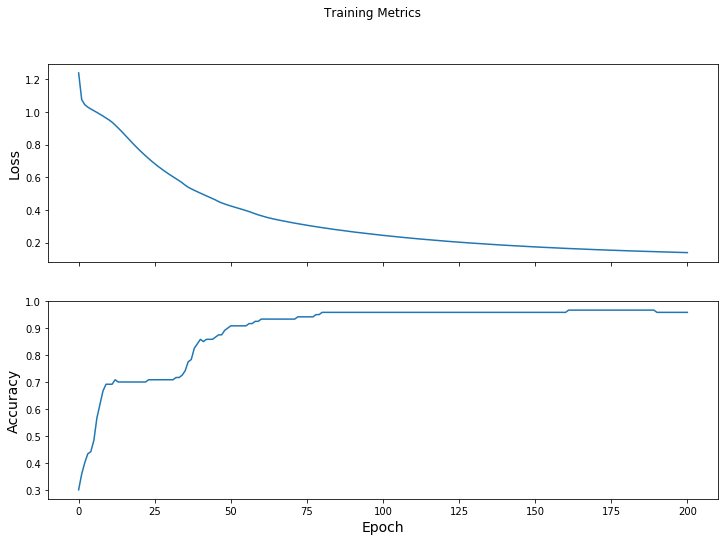

In [70]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [71]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

In [72]:
test_dataset = tf.contrib.data.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [73]:
test_accuracy = tfe.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [74]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: id=211644, shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]])>

In [75]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (98.1%)
Example 1 prediction: Iris versicolor (93.7%)
Example 2 prediction: Iris virginica (66.4%)
